# Introduction

This project will investigate the correlation between geographical factors like latitude and population density with the spread in cases of COVID-19

The objective of this study is to prepare data, followed by analysis with plots to grasp common trends and draw a conclusion.

Some questions this study hopes to answer are:
- Have Infection Rates changed over the past 3 months?
- How do different state's infection rates compare?
- Is there a correlation between latitude and infection rates?
- Is there a correlation between average temperature and infection rates?

Data Sources:
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv
- https://catalog.data.gov/dataset/provisional-covid-19-death-counts-in-the-united-states-by-county
- https://covidtracking.com/data/download

First, we import the necessary modules to read and visualize the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

# Loading the Data

We'll be looking at two datasets in this project
1. A list of average temperatures in each State 
2. A list of COVID-19 cases in every county

In [2]:
average_temperatures = pd.read_csv('Temperature_Data.csv')
US_cases_over_time = pd.read_csv('time_series_covid_19_confirmed_US.csv')
Provisional_Deaths = pd.read_csv('Provisional_COVID-19_Death_Counts_in_the_United_States_by_County.csv')
#group the cases by state and calculate averages for each date. Then, choose some states and make a linegraph with x-axis being the dates and y-axis being cases


In [3]:
print(average_temperatures.shape)
average_temperatures.head()

(50, 2)


,State,AverageTemperature
0,Alaska,26.6
1,Alabama,62.8
2,Arizona,60.3
3,Arkansas,60.4
4,California,59.4


In [4]:
print(US_cases_over_time.shape)
US_cases_over_time.head()

(3342, 505)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864


# Exploring the Data

While the dataset with temperatures is easy enough to understand, we can see that the second table has a dizzying amount of data (3342 X 505)!. It measures COVID-19 cases in every county, every day from 1/22/20 to 5/29/21.

To get a better grasp of this data, let's group all counties within a state together, taking averages of COVID cases for each date.

In [5]:
Average_US_Cases_2 = US_cases_over_time.groupby('Province_State').mean()
Average_US_Cases = Average_US_Cases_2.drop(['UID', 'code3', 'FIPS','Lat', 'Long_'], axis = 1)
Average_US_Cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7843.913043,7850.333333,7854.028986,7856.869565,7858.782609,7863.217391,7867.115942,7872.130435,7875.434783,7875.434783
Alaska,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2116.212121,2118.242424,2118.242424,2118.242424,2121.181818,2122.787879,2124.818182,2126.121212,2127.515152,2127.515152
American Samoa,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arizona,0.0,0.0,0.0,0.0,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,51482.058824,51515.647059,51553.588235,51572.470588,51598.941176,51628.352941,51666.941176,51711.882353,51759.352941,51792.117647
Arkansas,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4411.194805,4413.805195,4416.103896,4417.363636,4418.000000,4422.272727,4424.649351,4427.480519,4430.259740,4432.337662


Now that we've condensed our data a bit and dropped some extra variables, let's use a line graph to see the data trends for each state. 

In [6]:
Cases_List = Average_US_Cases.values.tolist()
Dates_List = Average_US_Cases.columns.tolist()
States_List = Average_US_Cases.index.tolist()

Looking at the first 14 states, we see some states (especially warmer ones) drastically jump up at the start of the summer months. Cooler States like Alaska and Colorado are slower in their growth. While it's great to get a qualitative look at the data using graphs, a quantitative measure would be a lot more concrete. Let's find the correlation between average temperatures and infection rates.

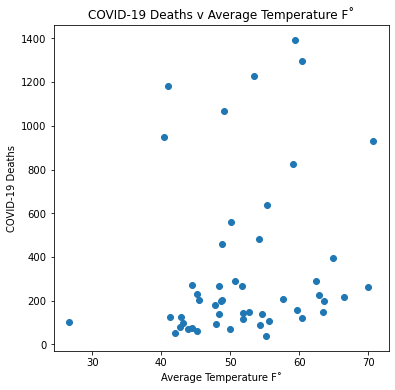

(0.18517348671657977, 0.1979466523481876)

In [17]:
state_average_death = Provisional_Deaths.groupby('State')['Deaths involving COVID-19'].mean().reset_index()
state_average_death.drop([7], inplace = True)
plt.scatter(x = average_temperatures.AverageTemperature, y = state_average_death['Deaths involving COVID-19'])
plt.title('COVID-19 Deaths v Average Temperature F˚')
plt.xlabel('Average Temperature F˚')
plt.ylabel('COVID-19 Deaths')
plt.rcParams['figure.figsize'] = [6, 6]   
correlation = pearsonr(average_temperatures.AverageTemperature, state_average_death['Deaths involving COVID-19'])
plt.show()

correlation

While we visually see a slight positive correlation between higher temperatures and Covid Death Rates, it's not very strong. The Pearson Correlation Coefficient gives us a value of around 0.2, signifying a very weak correlation. 

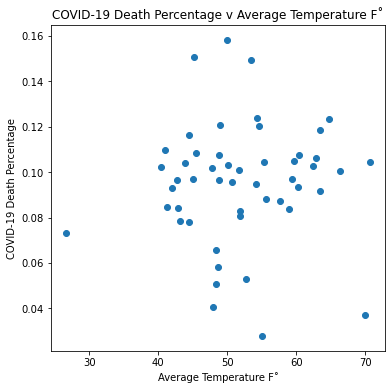

(0.03997381934492089, 0.7828410876916541)

In [16]:
function = lambda row: row['Deaths involving COVID-19']/row['Deaths from All Causes']
Provisional_Deaths['Cov_Death_Percentage'] = Provisional_Deaths.apply(function, axis = 1)
state_average_deathpercentage = Provisional_Deaths.groupby('State')['Cov_Death_Percentage'].mean().reset_index()
state_average_deathpercentage.drop([7], inplace = True)

plt.scatter(x = average_temperatures.AverageTemperature, y = state_average_deathpercentage['Cov_Death_Percentage'])
plt.title('COVID-19 Death Percentage v Average Temperature F˚')
plt.xlabel('Average Temperature F˚')
plt.ylabel('COVID-19 Death Percentage')
plt.rcParams['figure.figsize'] = [6, 6]   
correlation = pearsonr(average_temperatures.AverageTemperature, state_average_deathpercentage['Cov_Death_Percentage'])
plt.show()

correlation


However, if we calculate the **percentage** of COVID-19 deaths in relation to total deaths and plot that in relationship to temperature, we get a much stronger correlation with a Pearson Correlation Coefficient of ≈0.78. This signifies a strong correlation.

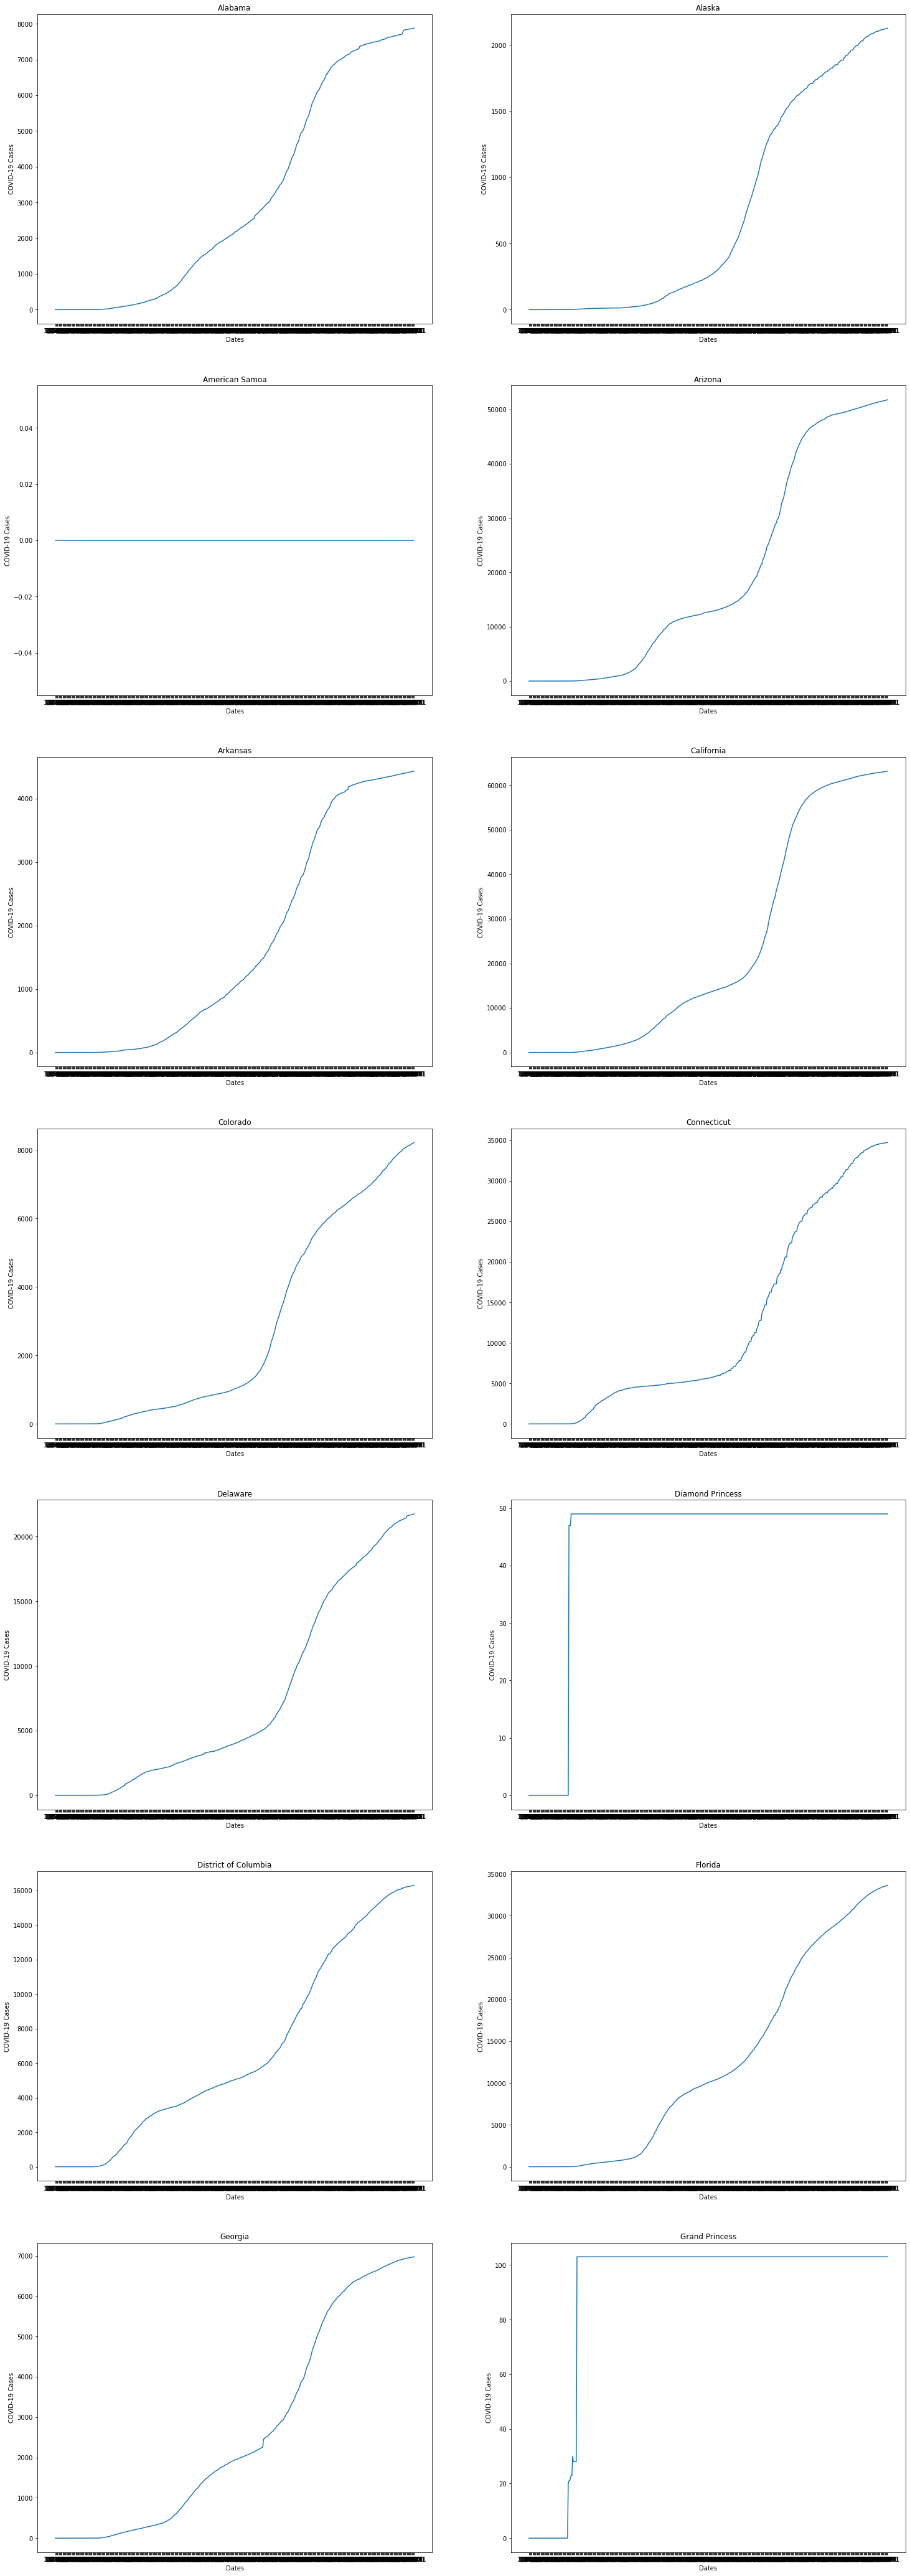

In [19]:
for i in range(len(Cases_List)//4):
    
    plt.subplot(7,2,i+1)
    plt.plot(Dates_List, Cases_List[i])
    plt.xlabel('Dates')
    plt.ylabel('COVID-19 Cases')
        
    plt.title(States_List[i])
    
plt.rcParams['figure.figsize'] = [25, 75]    
plt.show()